In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predictive-maintenance-dataset-ai4i-2020/ai4i2020.csv
/kaggle/input/d/rashaali2003/predictive-maintenance/predictive_maintenance.csv
/kaggle/input/d/abdelazizsami/predictive-maintenance-dataset/ai 2020.csv
/kaggle/input/d/angevalli/predictive-maintenance-dataset/Dataset_2.1.csv
/kaggle/input/d/angevalli/predictive-maintenance-dataset/data_pizza_robot.csv
/kaggle/input/d/angevalli/predictive-maintenance-dataset/Dataset_3.2.h5
/kaggle/input/d/angevalli/predictive-maintenance-dataset/Dataset_4.1.h5
/kaggle/input/dataset-for-predictive-maintenance/PM_test.txt
/kaggle/input/dataset-for-predictive-maintenance/PM_train.txt
/kaggle/input/dataset-for-predictive-maintenance/PM_truth.txt
/kaggle/input/machine-failure-prediction-using-sensor-data/data.csv
/kaggle/input/pred-maintanance-data/PM_test.txt
/kaggle/input/pred-maintanance-data/PM_train.txt
/kaggle/input/pred-maintanance-data/PM_truth.txt
/kaggle/input/condition-monitoring-of-hydraulic-systems/description.txt
/kaggle/input/

This synthetic dataset is modeled after an existing milling machine and consists of 10 000 data points from a stored as rows with 14 features in columns


1. UID: unique identifier ranging from 1 to 10000
2. product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
3. type: just the product type L, M or H from column 2
4. air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
5. process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
6. rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
7. torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.
8. tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
9. a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.


The machine failure consists of five independent failure modes


1. tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
2. heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.
3. power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
4. overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
5. random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. 

In [2]:
df=pd.read_csv("/kaggle/input/predictive-maintenance-dataset-ai4i-2020/ai4i2020.csv")

In [3]:
# Displaying dataset to understand the structure
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [4]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

<h3 style = "background-color: #000033;
             padding: 15px;
             font: bold 32px arial;
             color: #ccebff;
             border: 2px #e6e6ff;
             border-radius: 8px">
Which data points shows Machine Failure??</h3>

In [5]:
df[df["Machine failure"]==1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


<h3 style = "background-color: #000033;
             padding: 15px;
             font: bold 32px arial;
             color: #ccebff;
             border: 2px #e6e6ff;
             border-radius: 8px">
DATA PREPROCESSING</h3>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
# Checking for null values and duplicates

In [8]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Understanding data types and unique values per column

In [11]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [12]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [13]:
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [14]:
df.drop(columns=['UDI','Product ID'],inplace=True)

<h3 style = "background-color: #000033;
             padding: 15px;
             font: bold 32px arial;
             color: #ccebff;
             border: 2px #e6e6ff;
             border-radius: 8px">
Feature Engineering
</h3>

In [15]:
# Creating new feature: temperature difference between process and air
df['temperature_difference']=df['Process temperature [K]']-df['Air temperature [K]']

In [16]:
# Creating new feature: mechanical power using torque and rotational speed
df['Mechanical Power [W]']=np.round((df['Torque [Nm]']*df['Rotational speed [rpm]']* 2 * np.pi) / 60,4)

In [17]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,temperature_difference,Mechanical Power [W]
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6951.5906
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6826.7227
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.3875
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5927.5047
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5897.8166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,9.6,4955.1294
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,9.5,5434.7040
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,9.6,5753.6175
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,9.7,7151.1026


<h3 style = "background-color: #000033;
             padding: 15px;
             font: bold 32px arial;
             color: #ccebff;
             border: 2px #e6e6ff;
             border-radius: 8px">
Statistical Description
</h3>

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.004930,2.000259,295.3000,298.3000,300.10000,301.5000,304.500
Process temperature [K],10000.0,310.005560,1.483734,305.7000,308.8000,310.10000,311.1000,313.800
Rotational speed [rpm],10000.0,1538.776100,179.284096,1168.0000,1423.0000,1503.00000,1612.0000,2886.000
Torque [Nm],10000.0,39.986910,9.968934,3.8000,33.2000,40.10000,46.8000,76.600
Tool wear [min],10000.0,107.951000,63.654147,0.0000,53.0000,108.00000,162.0000,253.000
Machine failure,10000.0,0.033900,0.180981,0.0000,0.0000,0.00000,0.0000,1.000
TWF,10000.0,0.004600,0.067671,0.0000,0.0000,0.00000,0.0000,1.000
HDF,10000.0,0.011500,0.106625,0.0000,0.0000,0.00000,0.0000,1.000
PWF,10000.0,0.009500,0.097009,0.0000,0.0000,0.00000,0.0000,1.000
OSF,10000.0,0.009800,0.098514,0.0000,0.0000,0.00000,0.0000,1.000



<h3 style = "background-color: #000033;
             padding: 15px;
             font: bold 32px arial;
             color: #ccebff;
             border: 2px #e6e6ff;
             border-radius: 8px">
Exploratory Data Analysis 
</h3>

# 1) Plotting the Distribution of Machine Types

#### Helps you to see how many machines belong to each type (L, M, H)

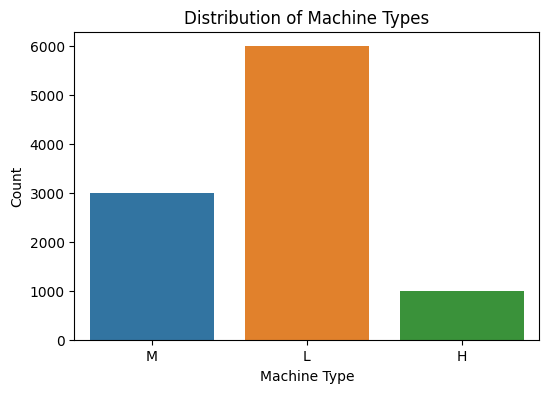

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Machine Types')
plt.xlabel('Machine Type')
plt.ylabel('Count')
plt.show()


# 2) Visualizing Failure Distribution Across Product Types
#### Shows how failures are spread across types — are some types failing more?

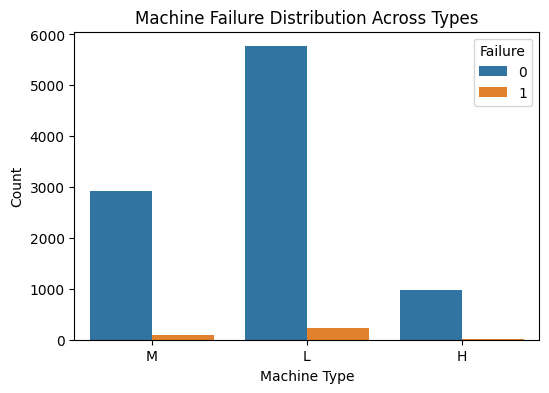

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', hue='Machine failure', data=df)
plt.title('Machine Failure Distribution Across Types')
plt.xlabel('Machine Type')
plt.ylabel('Count')
plt.legend(title='Failure')
plt.show()



# 3) Plotting Feature Distributions to Observe Patterns or Anomalies

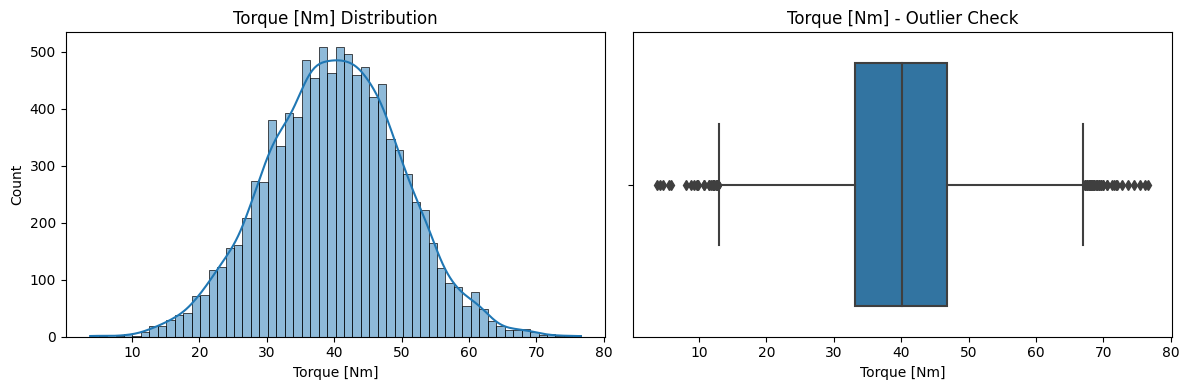

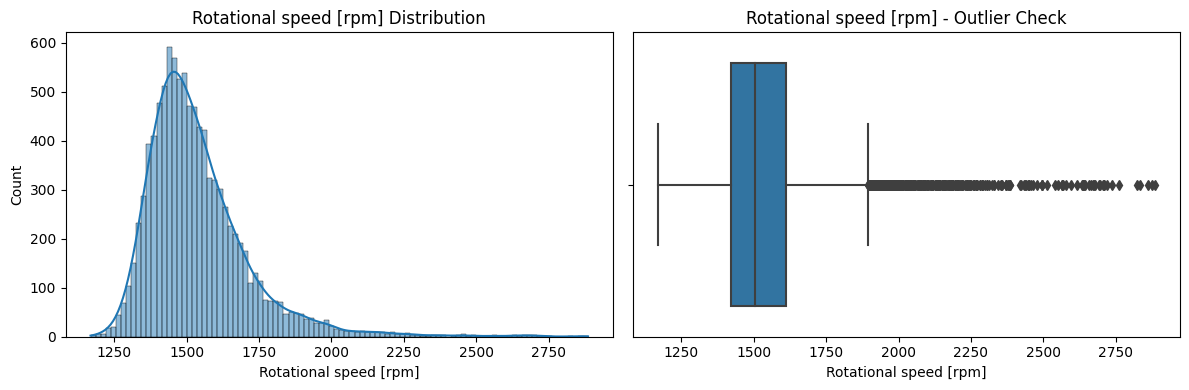

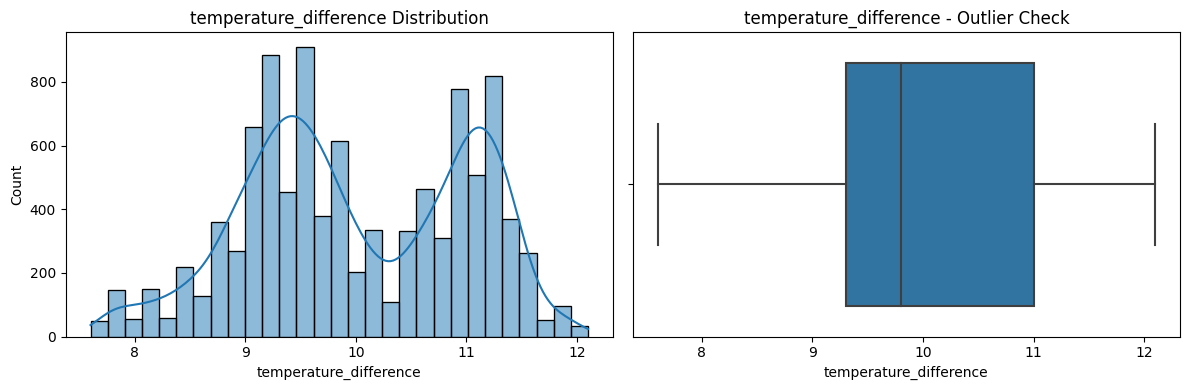

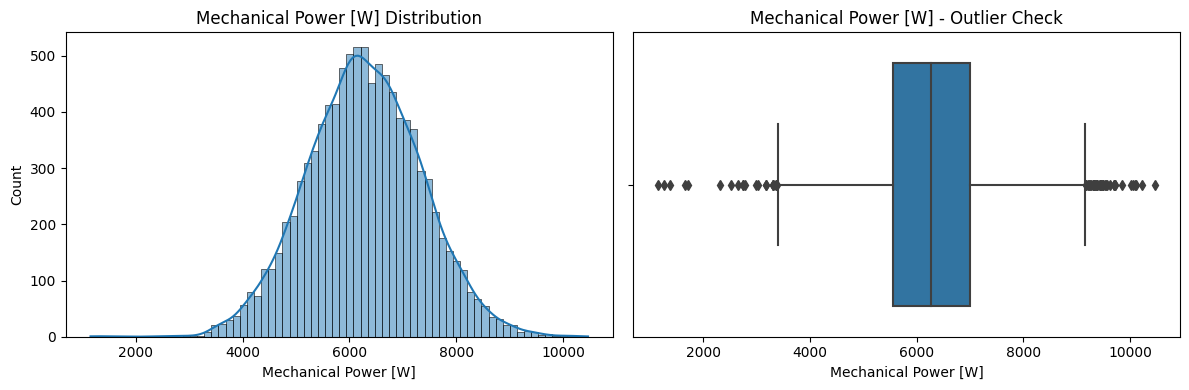

In [21]:
cols = ['Torque [Nm]', 'Rotational speed [rpm]', 'temperature_difference', 'Mechanical Power [W]']

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Distribution")

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f"{col} - Outlier Check")

    plt.tight_layout()
    plt.show()

# 4) Pairplot for Feature Relationships
#### Shows interaction between features colored by failure

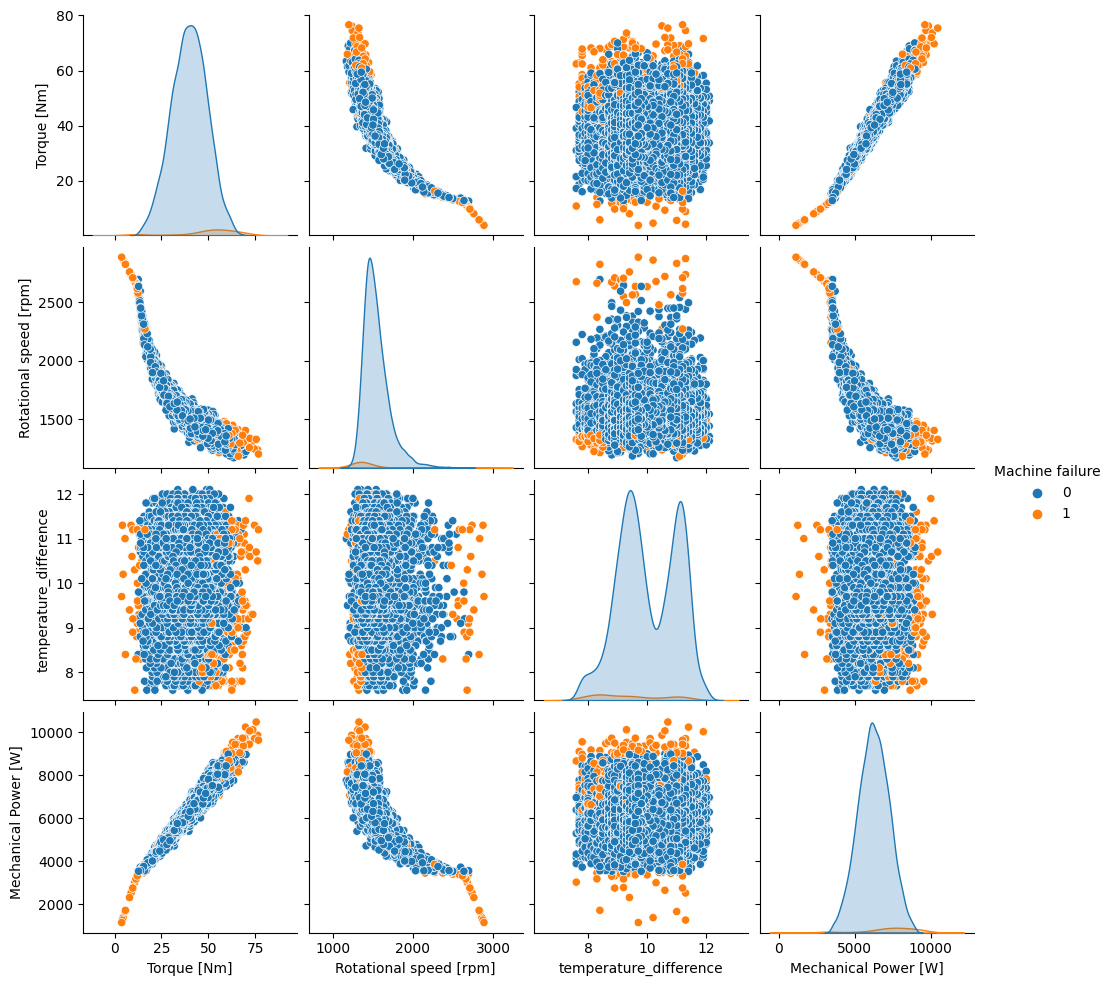

In [22]:
sns.pairplot(df[['Torque [Nm]', 'Rotational speed [rpm]', 'temperature_difference','Mechanical Power [W]', 'Machine failure']], hue='Machine failure')
plt.show()



<h3 style = "background-color: #000033;
             padding: 15px;
             font: bold 32px arial;
             color: #ccebff;
             border: 2px #e6e6ff;
             border-radius: 8px">
 Correlation of features
</h3>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

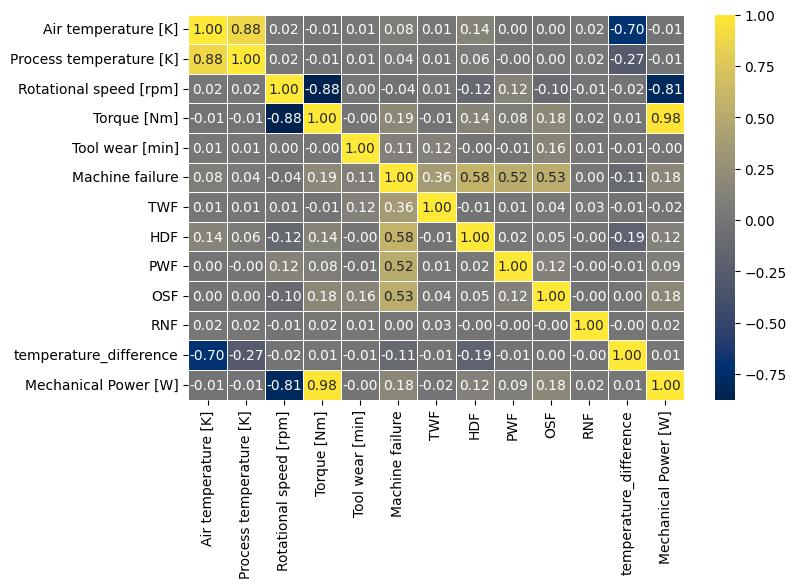

In [24]:
# Checking correlation between numerical features using a heatmap
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,cmap='cividis',fmt=".2f", linewidths=0.5)

In [25]:
# Checking correlation between different failure using a heatmap

<Axes: >

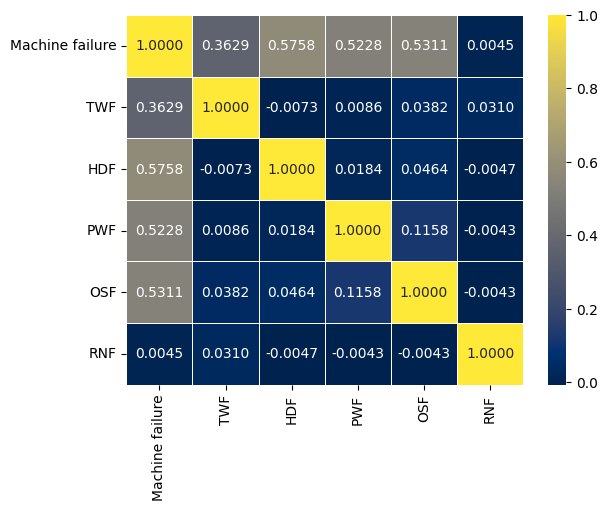

In [26]:
target=df.iloc[:,[6,7,8,9,10,11]]
target_mat=target.corr()
sns.heatmap(target_mat,annot=True,cmap="cividis",fmt=".4f",linewidth=0.5)

Tool wear failure (TWF), heat dissipation failure (HDF),power failure (PWF),overstrain failure (OSF) and random failures (RNF) shows more positive correlation with target variable i.e. machine failure. Thus dropping columns 'TWF','HDF','PWF','OSF','RNF'.


In [27]:
df.drop(columns=['TWF','HDF','PWF','OSF','RNF'],inplace=True)

In [28]:
df.sample(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,temperature_difference,Mechanical Power [W]
7528,M,300.1,311.3,1748,26.6,42,0,11.2,4869.1335
7290,L,300.3,310.6,1806,24.4,88,0,10.3,4614.6226
6082,L,300.9,310.7,1352,46.4,212,0,9.8,6569.3635




<h3 style = "background-color: #000033;
             padding: 15px;
             font: bold 32px arial;
             color: #ccebff;
             border: 2px #e6e6ff;
             border-radius: 8px">
  Encoding Columns
</h3>

In [29]:
# Label encoding categorical variables (column- Type)
from sklearn.preprocessing import LabelEncoder
df['Type'] = LabelEncoder().fit_transform(df['Type'])


<h3 style = "background-color: #000033;
             padding: 15px;
             font: bold 32px arial;
             color: #ccebff;
             border: 2px #e6e6ff;
             border-radius: 8px">
FEATURE SCALING
</h3>

In [30]:
# Scaling numerical features using StandardScaler for model compatibility
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data=pd.DataFrame(scale.fit_transform(df),columns=df.columns,index=df.index)

In [31]:
data.sample(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,temperature_difference,Mechanical Power [W]
1618,-0.332223,-1.052382,-1.486567,-1.409990,1.957488,-0.831896,-0.187322,-0.100525,1.623715
7125,-0.332223,0.347507,0.063653,-1.549440,1.666569,-0.156337,-0.187322,-0.600004,1.118995
7728,-0.332223,0.347507,1.209468,-0.662535,0.703530,0.173587,-0.187322,1.098224,0.664488
1064,1.333889,-1.602338,-1.419166,-0.723893,0.432675,0.582065,-0.187322,1.098224,0.240523
9941,-0.332223,-0.802401,-1.284364,-0.801986,0.402580,-0.250601,-0.187322,-0.300317,0.138616
4559,-0.332223,1.347428,0.468059,-0.590021,0.372485,-1.491745,-0.187322,-1.998544,0.260479
859,-1.998335,-1.902314,-2.025774,0.017983,0.061503,-1.256085,-0.187322,0.798537,0.258821
5501,-0.332223,1.347428,1.411671,0.023561,-0.249478,-1.177531,-0.187322,-0.600004,-0.206488
2648,-0.332223,-0.102457,-0.408153,-0.573287,1.164986,0.786304,-0.187322,-0.400212,1.386346
5756,1.333889,0.997456,1.007266,-0.963748,1.235208,-0.847607,-0.187322,-0.500108,1.125784



<h3 style = "background-color: #000033;
             padding: 15px;
             font: bold 32px arial;
             color: #ccebff;
             border: 2px #e6e6ff;
             border-radius: 8px">
 Splitting data into features (X) and target (y)

</h3>

In [32]:
Y=df.pop("Machine failure")
X=df

In [33]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],temperature_difference,Mechanical Power [W]
0,2,298.1,308.6,1551,42.8,0,10.5,6951.5906
1,1,298.2,308.7,1408,46.3,3,10.5,6826.7227
2,1,298.1,308.5,1498,49.4,5,10.4,7749.3875
3,1,298.2,308.6,1433,39.5,7,10.4,5927.5047
4,1,298.2,308.7,1408,40.0,9,10.5,5897.8166
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,9.6,4955.1294
9996,0,298.9,308.4,1632,31.8,17,9.5,5434.7040
9997,2,299.0,308.6,1645,33.4,22,9.6,5753.6175
9998,0,299.0,308.7,1408,48.5,25,9.7,7151.1026


In [34]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64


<h3 style = "background-color: #000033;
             padding: 15px;
             font: bold 32px arial;
             color: #ccebff;
             border: 2px #e6e6ff;
             border-radius: 8px">
Handling Imbalanced Data
</h3>

In [35]:
# SMOTE- Synthetic Minority Over-sampling Technique 
# SMOTE is a method for handling imbalanced datasets in machine learning. 
# Goal: To increase the number of instances in the minority class by creating synthetic samples. 
# How it works: SMOTE generates new examples by interpolating between existing minority class instances and their nearest neighbors.
# This helps the model learn better about the minority class and improves its performance on imbalanced datasets. 


In [36]:
# print distribution of class before SMOTE
from collections import Counter

counts = Counter(Y)
print(counts)


Counter({0: 9661, 1: 339})


In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)


In [38]:
# print distribution of class AFTER SMOTE

from collections import Counter

counts = Counter(y_resampled )
print(counts)


Counter({0: 9661, 1: 9661})



<h3 style = "background-color: #000033;
             padding: 15px;
             font: bold 32px arial;
             color: #ccebff;
             border: 2px #e6e6ff;
             border-radius: 8px">
Train Test Split
</h3>

In [39]:
#Performing train-test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,y_resampled,test_size=0.1)


<h3 style = "background-color: #000033;
             padding: 15px;
             font: bold 32px arial;
             color: #ccebff;
             border: 2px #e6e6ff;
             border-radius: 8px">
 Let's see which algorithm gives best accuracy
</h3>

In [40]:
# Importing machine learning models

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
        'Logistic Regression CV': LogisticRegressionCV(),
    'SGD': SGDClassifier(),
    
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [42]:
# Creating a function to fit models on our dataset and check which model gives highest accuracy

def evaluate_model(X_train,X_test,Y_train,Y_test):
    result=[]
    for name, model in models.items():
        model.fit(X_train,Y_train)
        y_pred=model.predict(X_test)
        acc=accuracy_score(Y_test,y_pred)
        result.append((name,acc))
    # Sort models by accuracy
    result.sort(key=lambda x: x[1], reverse=True)
    return result
    
        

In [43]:
results = evaluate_model(X_train,X_test,Y_train,Y_test)
    
print("Model Performance:")
for name, acc in results:
    print(f"{name}: {acc:.6f}")

Model Performance:
Random Forest: 0.983963
Bagging: 0.977237
Decision Tree: 0.968443
Gradient Boosting: 0.956544
AdaBoost: 0.935851
K-Nearest Neighbors: 0.935334
Logistic Regression CV: 0.871702
Logistic Regression: 0.871185
Support Vector Machine: 0.802897
SGD: 0.659596


 Here, we can clearly see Random Forest is yielding best accuracy from all algorithms.
 So,we will further tune the parameters to get the better performance 

In [44]:
 RF=RandomForestClassifier(class_weight='balanced')

In [45]:
RF.fit(X_train,Y_train)
y_pred=RF.predict(X_test)
acc=accuracy_score(Y_test,y_pred)

In [46]:
acc

0.983445421624418

In [47]:
# Lets check model performances using accuracy, precision, recall, and F1-score

In [48]:
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    roc_auc_score, 
    RocCurveDisplay, 
    precision_recall_curve, 
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Classification Report
    print(f"--------- {model_name} Classification Report ------ \n\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    roc_auc = roc_auc_score(y_test, y_prob)
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"{model_name} - ROC Curve (AUC = {roc_auc:.2f})")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.show()


--------- Random Forest Classification Report ------ 


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       968
           1       0.98      0.99      0.98       965

    accuracy                           0.98      1933
   macro avg       0.98      0.98      0.98      1933
weighted avg       0.98      0.98      0.98      1933



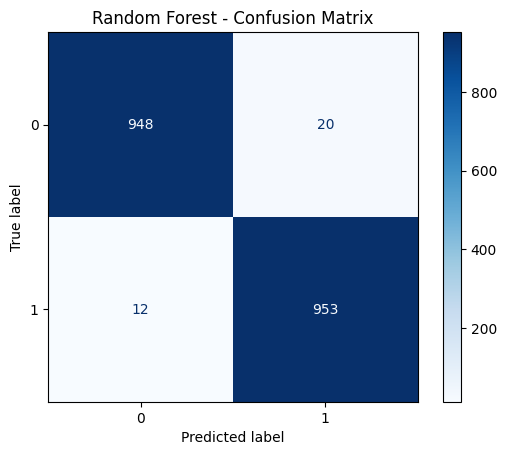

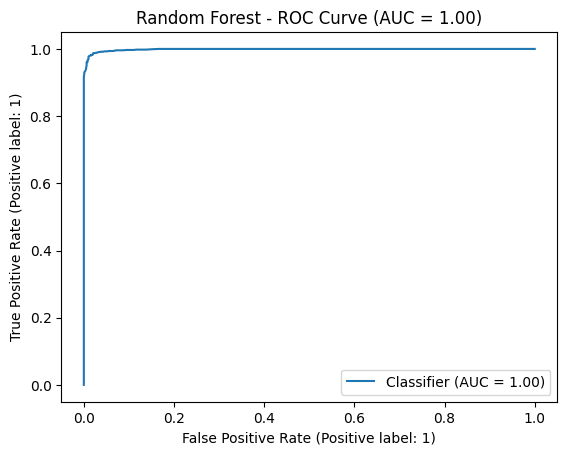

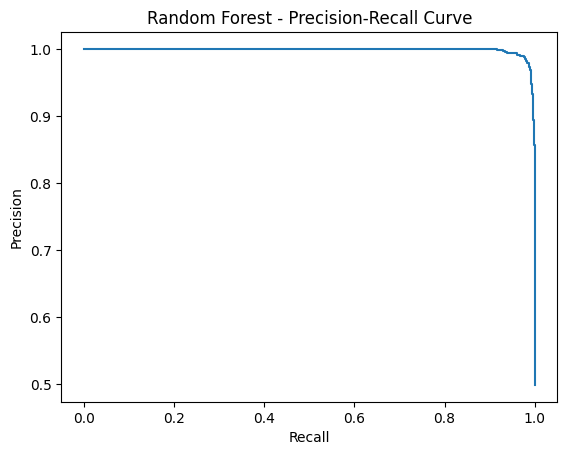

In [50]:
evaluate_model(RF, X_test, Y_test, model_name="Random Forest")


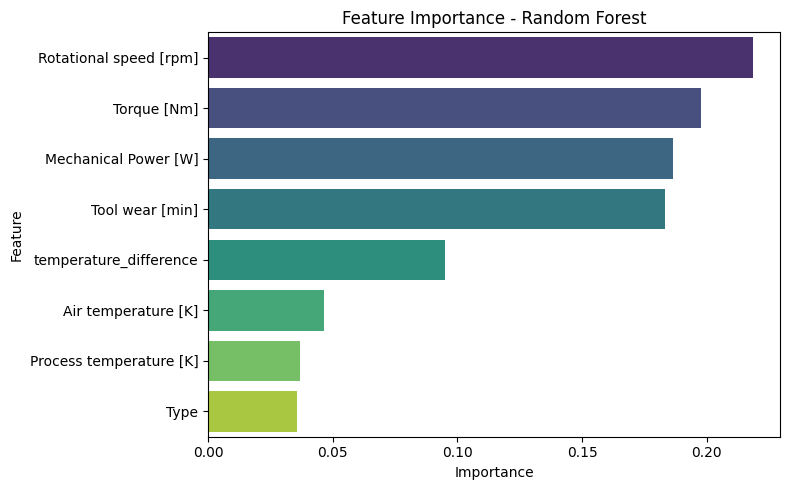

In [51]:
importances = RF.feature_importances_
feature_names = X.columns

# Create a DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


<h3 style = "background-color: #000033;
             padding: 15px;
             font: bold 32px arial;
             color: #ccebff;
             border: 2px #e6e6ff;
             border-radius: 8px">
 Found it useful? Upvote 🙌
</h3>